#  PSTAT 197A Project Part 1

# by Mitchell Rapaport, Lia Ran, Angel Chen

# A

## A(1)

In [94]:
import numpy as np
data=np.load('part1a.npz')
data

In [95]:
N = data['N']
print(N)

100000.0


In [96]:
Svc_0_pmf = data['Svc_0_pmf']
print(Svc_0_pmf)

[[0.10953309 0.03300776 0.08179044 0.11593994]
 [0.03089752 0.08511994 0.04528764 0.05718283]
 [0.07471465 0.02495643 0.10236599 0.04256696]
 [0.01605863 0.08109608 0.09158212 0.00789999]]


In [97]:
Lc = data['Lc']
print(Lc)

[0.3 0.4 0.7 1. ]


In [98]:
Ic_0 = data['Ic_0']
print(Ic_0)

[47 90 51 65]


In [99]:
gamma = data['gamma']
print(gamma)

0.07142857142857142


In [100]:
from scipy import integrate
from itertools import product
import matplotlib.pyplot as plt
import matplotlib as mpl

beta_values = np.linspace(0,1,16)
t=np.linspace(1,120,120)

#print(beta_values)
#print(t)

In [101]:
def SIR_model(t, Y, betas, gamma):
    S_vector=Y[:16]
    I_vector=Y[16:20]
    R=Y[20]
    
    dSvc_dt= -(betas*S_vector*sum(I_vector))/N
    dIc_dt1= -np.sum((dSvc_dt[0], dSvc_dt[4], dSvc_dt[8], dSvc_dt[12]))-gamma*I_vector[0]
    dIc_dt2= -np.sum((dSvc_dt[1], dSvc_dt[5], dSvc_dt[9], dSvc_dt[13]))-gamma*I_vector[1]
    dIc_dt3= -np.sum((dSvc_dt[2], dSvc_dt[6], dSvc_dt[10], dSvc_dt[14]))-gamma*I_vector[2]
    dIc_dt4= -np.sum((dSvc_dt[3], dSvc_dt[7], dSvc_dt[11], dSvc_dt[15]))-gamma*I_vector[3]
    dIc_dt = np.concatenate((dIc_dt1, dIc_dt2, dIc_dt3, dIc_dt4), axis=None)
    dR_dt= gamma*sum(I_vector)
    RHS_vector=np.concatenate((dSvc_dt, dIc_dt, dR_dt),axis=None)

    return RHS_vector

In [102]:
initial_states = np.concatenate((Svc_0_pmf*(N-sum(Ic_0)), Ic_0, 0), axis=None)
print(initial_states)

[10925.59735989  3292.42498916  8158.35136699 11564.66095375
  3081.93503133  8490.45835427  4517.30632554  5703.81528811
  7452.56208837  2489.3286058  10210.70031003  4245.92611737
  1601.80065781  8089.09109282  9135.04126738   788.00019138
    47.            90.            51.            65.
     0.        ]


In [103]:
soln_obj=integrate.solve_ivp(SIR_model, (t[0],t[-1]), initial_states, args=(beta_values, gamma), dense_output=True)

## A(2)

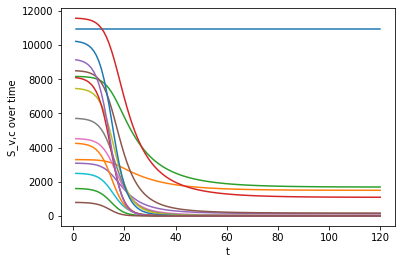

In [104]:
plt.plot(t, soln_obj.sol(t)[0:16].T)
plt.xlabel("t")
plt.ylabel("S_v,c over time")
plt.show()

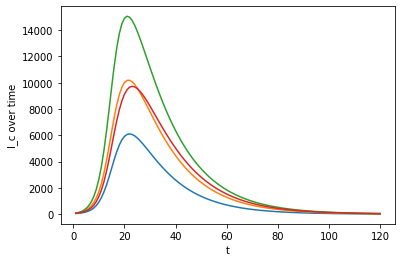

In [105]:
plt.plot(t, soln_obj.sol(t)[16:20].T)
plt.xlabel("t")
plt.ylabel("I_c over time")
plt.show()

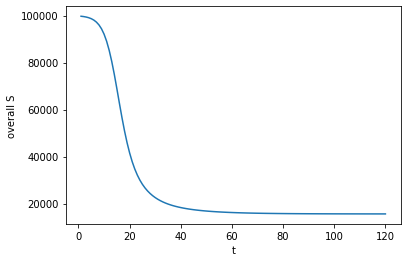

In [106]:
plt.plot(t, sum(soln_obj.sol(t)[0:16]))
plt.xlabel("t")
plt.ylabel("overall S")
plt.show()

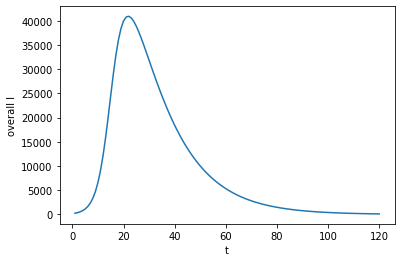

In [107]:
plt.plot(t, sum(soln_obj.sol(t)[16:20]))
plt.xlabel("t")
plt.ylabel("overall I")
plt.show()

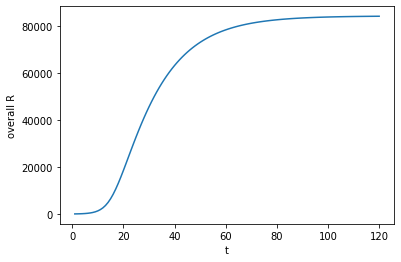

In [108]:
plt.plot(t, soln_obj.sol(t)[20].T)
plt.xlabel("t")
plt.ylabel("overall R")
plt.show()

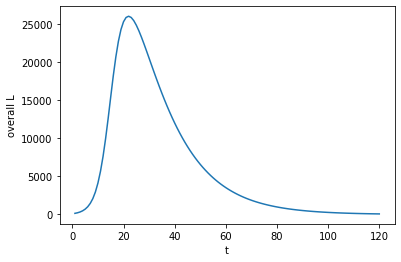

In [109]:
sum0 = soln_obj.sol(t)[16]*Lc[0]
sum1 = soln_obj.sol(t)[17]*Lc[1]
sum2 = soln_obj.sol(t)[18]*Lc[2]
sum3 = soln_obj.sol(t)[19]*Lc[3]

plt.plot(t, np.sum((sum0, sum1, sum2, sum3), axis=0))
plt.xlabel("t")
plt.ylabel("overall L")
plt.show()

## A(3)

S, I and R look similar to what we expected. S exponentially decreases until it converges to some number meaning the entire population who can be infected has been infected, and I exponentially increases at the same rate until the entire population is infected and it then decreases until it converges to 0. R exponentially increases until it starts to plateau once the entire population recovers. When people say flatten the curve they are referring to the t vs I graph, i.e. the amount of total infected people over time. Flattening the curve makes it easier for hospitals to treat the infected by spreading out the amount of infected people over time rather than having everyone infected at once. 

## A(4)

Some $S_{v,c}$ compartments converged to a positive value because that amount of people within the given population may be immune or all the infected people had recovered already so the rest of the susceptible population had no one to be infected by. For one specific population the amount of susceptible people stayed constant the whole time meaning no one within the population came in touch with an infected person. 

## A(5)

In [44]:
uninfected=soln_obj.y[0:16].T[-1]
for i in range(len(uninfected)):
    total_pop=soln_obj.y[i].T[0]+Ic_0[i%4]
    print('{}% of the population for compartment Svc_0_pmf={} was never infected.'\
          .format(100*uninfected[i]/total_pop,Svc_0_pmf[i//4,i%4]))

99.57166021445576% of the population for compartment Svc_0_pmf=0.10953309232250617 was never infected.
44.32128786342576% of the population for compartment Svc_0_pmf=0.033007759523213415 was never infected.
20.604978626494624% of the population for compartment Svc_0_pmf=0.08179044349192716 was never infected.
9.389400077682573% of the population for compartment Svc_0_pmf=0.11593993757955955 was never infected.
4.235882599206055% of the population for compartment Svc_0_pmf=0.030897521041566966 was never infected.
1.938423516974024% of the population for compartment Svc_0_pmf=0.08511993698328356 was never infected.
0.8825655031964387% of the population for compartment Svc_0_pmf=0.045287640987079075 was never infected.
0.40216275930156037% of the population for compartment Svc_0_pmf=0.057182825429433544 was never infected.
0.18425915888792302% of the population for compartment Svc_0_pmf=0.0747146489455268 was never infected.
0.08161138009148458% of the population for compartment Svc_0_pmf

## A(6)

In [45]:
beta_values2=beta_values/4
soln_obj2=integrate.solve_ivp(SIR_model, (t[0],t[-1]), initial_states, args=(beta_values2, gamma), dense_output=True)

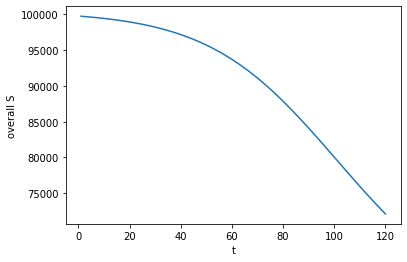

In [46]:
plt.plot(t, sum(soln_obj2.sol(t)[0:16]))
plt.xlabel("t")
plt.ylabel("overall S")
plt.show()

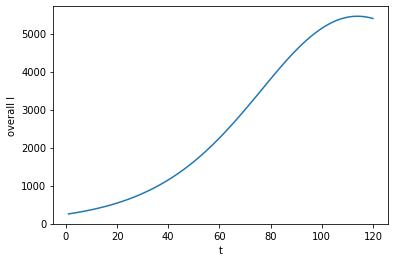

In [47]:
plt.plot(t, sum(soln_obj2.sol(t)[16:20]))
plt.xlabel("t")
plt.ylabel("overall I")
plt.show()

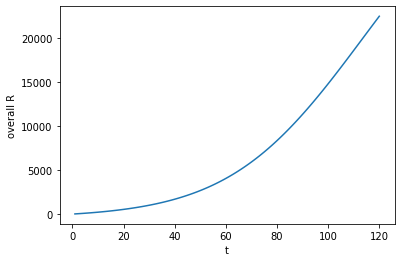

In [48]:
plt.plot(t, soln_obj2.sol(t)[20].T)
plt.xlabel("t")
plt.ylabel("overall R")
plt.show()

The S, I and R plots are much different because of the smaller beta values. Each graph is not nearly as exponential as before and are closer to being linear. The curve has definitely flattened as cases are spread out more evenly as time goes by. By the end of the 120 days, there is way less of the total population infected as compared to the previous beta values. 

In [24]:
uninfected2=soln_obj2.y[0:16].T[-1]
for i in range(len(uninfected2)):
    total_pop=soln_obj2.y[i].T[0]+Ic_0[i%4]
    print('{}% of the population for compartment Svc_0_pmf={} was never infected.'\
          .format(100*uninfected2[i]/total_pop,Svc_0_pmf[i//4,i%4]))

99.57166021445576% of the population for compartment Svc_0_pmf=0.10953309232250617 was never infected.
92.36262762187542% of the population for compartment Svc_0_pmf=0.033007759523213415 was never infected.
89.47696861811578% of the population for compartment Svc_0_pmf=0.08179044349192716 was never infected.
84.95581567587065% of the population for compartment Svc_0_pmf=0.11593993757955955 was never infected.
79.84799774967071% of the population for compartment Svc_0_pmf=0.030897521041566966 was never infected.
76.11455082855593% of the population for compartment Svc_0_pmf=0.08511993698328356 was never infected.
72.17407882936608% of the population for compartment Svc_0_pmf=0.045287640987079075 was never infected.
68.47710563917298% of the population for compartment Svc_0_pmf=0.057182825429433544 was never infected.
65.30486092933351% of the population for compartment Svc_0_pmf=0.0747146489455268 was never infected.
60.18108306441667% of the population for compartment Svc_0_pmf=0.02495

# B

## B(1)

In [115]:
import numpy as np
data2=np.load('part1b.npz')
data2.files

['N', 'Lc', 'Ic_0', 'gamma', 'L_validation', 'L_test', 'betas_validation']

In [116]:
N = data2['N']
print(N)

50000.0


In [117]:
Lc = data2['Lc']
print(Lc)

[0.3 0.4 0.7 1. ]


In [118]:
Ic_0 = data2['Ic_0']
print(Ic_0)
print(Ic_0[0])

[[47 90 51 65]
 [82 31 64 86]
 [30 66 39 47]
 [59 26 77 38]
 [20 63 70 15]
 [35 31 78 11]
 [50 55 93 26]
 [17 89 65 25]
 [70 27 66 97]
 [20 18 32 31]
 [76 13 61 15]
 [86 48 36 89]
 [96 15 44 71]
 [81 53 19 36]
 [29 44 99 36]
 [25 34 16 28]
 [23 84 71 31]
 [91 70 90 90]
 [32 11 68 81]
 [34 37 48 41]]
[47 90 51 65]


In [119]:
gamma = data2['gamma']
print(gamma)

0.07142857142857142


In [120]:
L_validation = data2['L_validation']
print(L_validation)

[[  151.15723798   157.09236032   166.0663423    175.26894184
    187.12271809   200.29536627   207.19011153   220.23944915
    235.52590645   247.09469931   263.51055631   281.18896107
    304.53407513   316.7776232    337.4146583    359.08603642
    376.95873111   410.63777058   432.23666001   466.32640805]
 [  168.20103748   175.31698233   184.41546073   191.23318015
    200.38958258   212.84378649   222.09570163   237.44506788
    251.13497681   263.20329764   281.12505942   299.02683147
    312.07088043   336.08191882   353.17466265   372.3214408
    404.21116271   424.09816716   450.52039605   482.72819186]
 [  108.25555772   116.61301613   122.162737     128.61290071
    136.27974903   143.16249542   153.75545994   158.05373752
    171.84080869   178.44468654   190.6241656    202.74814433
    214.01601724   233.09216822   246.84519371   265.9302079
    277.11406479   298.23288273   319.98076886   335.74020325]
 [  121.06511809   127.92622111   135.55296184   139.17575568
    145

In [121]:
L_test = data2['L_test']
#print(L_test)

In [122]:
betas_validation = data2['betas_validation']
print(betas_validation)

[[0.1  0.15 0.2  0.25]
 [0.2  0.25 0.3  0.4 ]
 [0.35 0.45 0.5  0.6 ]
 [0.4  0.5  0.6  0.8 ]]


In [124]:
#trying to figure out how this works for the very first node in v category v=0.2


from scipy import integrate
from itertools import product
from itertools import combinations_with_replacement 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error

t=np.linspace(0,19,20)
search_space = np.linspace(0,1,21) #search space for our betas

Svc_0_pmf = np.array([[0.5, 0.3, 0.1, 0.1], [0.4, 0.3, 0.2, 0.1], [0.3, 0.3, 0.2, 0.2], [0.1, 0.2, 0.3, 0.4]])

initial_states = np.concatenate((Svc_0_pmf[0]*(N-sum(Ic_0[0])), Ic_0[0], 0), axis=None)

mmse=np.inf
beta_mmse = np.nan

for (betas) in list(combinations_with_replacement(search_space, 4)):
    def SIR_model_b(t, Y, betas, gamma):
        S_vector=Y[:4]
        I_vector=Y[4:8]
        R=Y[8]
    
        dSvc_dt= -(betas*S_vector*sum(I_vector))/N
        dIc_dt1= -(dSvc_dt[0])-gamma*I_vector[0]
        dIc_dt2= -(dSvc_dt[1])-gamma*I_vector[1]
        dIc_dt3= -(dSvc_dt[2])-gamma*I_vector[2]
        dIc_dt4= -(dSvc_dt[3])-gamma*I_vector[3]
        dIc_dt = np.concatenate((dIc_dt1, dIc_dt2, dIc_dt3, dIc_dt4), axis=None)
        dR_dt= gamma*sum(I_vector)
        RHS_vector=np.concatenate((dSvc_dt, dIc_dt, dR_dt),axis=None)

        return RHS_vector
    
    soln_obj=integrate.solve_ivp(SIR_model_b, (t[0],t[-1]), initial_states, args=(search_space, gamma), method='RK45', dense_output=True)
   
    sum0 = soln_obj.sol(t)[16]*Lc[0]
    sum1 = soln_obj.sol(t)[17]*Lc[1]
    sum2 = soln_obj.sol(t)[18]*Lc[2]
    sum3 = soln_obj.sol(t)[19]*Lc[3]  

    L_estimated = np.sum((sum0, sum1, sum2, sum3), axis=0)

    mse = mean_squared_error(L_validation, L_estimated)
    
    if mse<mmse:
        mmse = mse
        beta_mmse=betas

print(beta_mmse)

ValueError: operands could not be broadcast together with shapes (21,) (4,) 

In [125]:
from itertools import combinations_with_replacement 
search_space = np.linspace(0,1,21)
a = list(combinations_with_replacement(search_space, 4))
print(a[0])

(0.0, 0.0, 0.0, 0.0)
